In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
import warnings # biblioteca que permite tirar os avisos da celula do notebook

In [42]:
df = pd.read_csv('dados_produtos (2).csv')

In [43]:
warnings.filterwarnings('ignore') # ignora os warnings


In [44]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


<Axes: xlabel='product_name', ylabel='rating'>

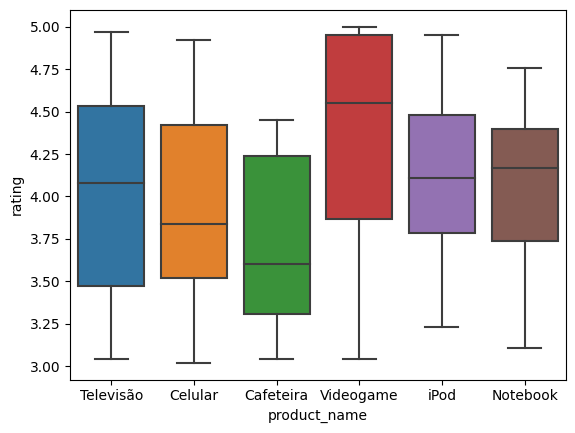

In [47]:
sns.boxplot(x= df['product_name'],y= df['rating'])

In [48]:
df.isnull().sum() # verifica se existe valores vazios na base de dados

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [49]:
df.isna().sum()

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [50]:
# selecionando apenas as colunas numericas do dataframe
col_n = df.select_dtypes(include=['number'])

In [51]:
# correlação
correlacao = col_n.corr()
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

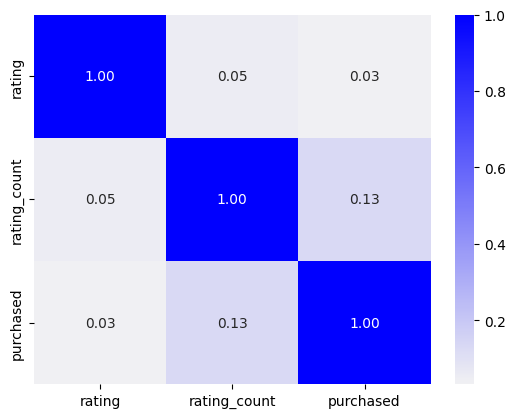

In [52]:
# plotando o gráfico da correlação
color = sns.color_palette('light:blue',as_cmap= True)
sns.heatmap(correlacao,cmap=color,fmt='.2f',annot= True)

In [53]:
produtos = df['product_name'].unique() # unifica os produtos em uma lista
for produto in produtos:
    produto_df= df.loc[df['product_name'] == produto]
    X = produto_df.drop(['purchased','product_name'],axis=1)
    y = produto_df['purchased']

X_train,x_test, y_train,y_test = train_test_split(X,y,
                                                  test_size=0.2,
                                                  random_state=42)




In [55]:
modelo = DecisionTreeClassifier() # cria o modelo de ML
modelo.fit(X_train,y_train)
ypred = modelo.predict(x_test)


 -----  Árvore de decisão produto: Notebook ----- 

Avaliando o modelo de árvore de decisão
Acurácia: 0.5
Precision score: 0.3333333333333333
Recall: 1.0
F1-Score: 0.5


[Text(0.625, 0.9, '4.76 <= 4.645\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = Comprou'),
 Text(0.5, 0.7, '4.76 <= 3.84\ngini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = Comprou'),
 Text(0.25, 0.5, '4.76 <= 3.545\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = Não comprou'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Comprou'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Não comprou'),
 Text(0.75, 0.5, '4.42 <= 1933.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = Comprou'),
 Text(0.625, 0.3, '4.42 <= 1491.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Comprou'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Comprou'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não comprou'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Comprou'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não comprou')]

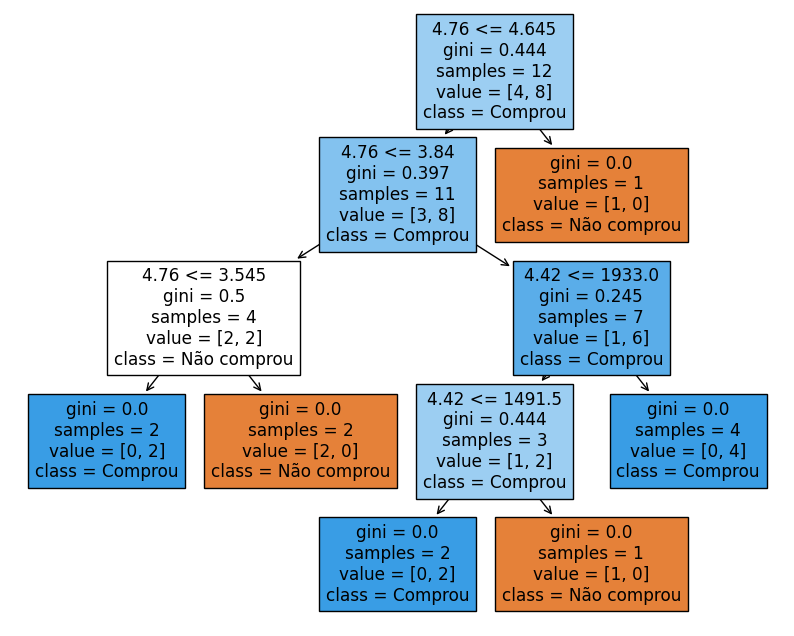

In [58]:
print(f'\n -----  Árvore de decisão produto: {produto} ----- \n')
print('Avaliando o modelo de árvore de decisão')
print(f'Acurácia: {accuracy_score(y_test,ypred)}')
print(f'Precision score: {precision_score(y_test,ypred)}')
print(f'Recall: {recall_score(y_test,ypred)}')
print(f'F1-Score: {f1_score(y_test,ypred)}')
produto_df['purchased']= produto_df['purchased'].replace([1,0],
                                                         ['Comprou','Não comprou'])
fig = plt.figure(figsize=(10,8))
tree.plot_tree(modelo,feature_names=produto_df['rating'].tolist(),
             class_names= produto_df['purchased'].tolist(),filled=True  )

<Axes: >

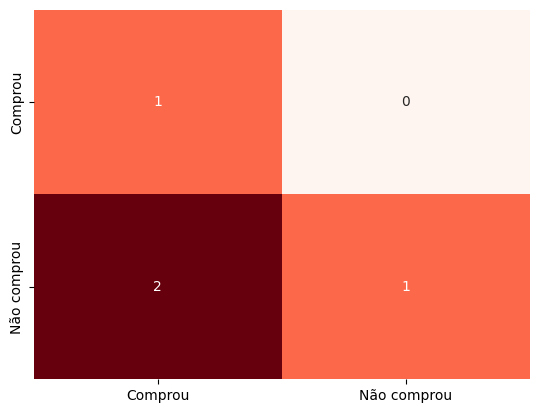

In [60]:
sns.heatmap(confusion_matrix(ypred,y_test),annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Comprou', 'Não comprou'], 
            yticklabels=['Comprou','Não comprou'])   

In [62]:
notasprodutos = df.groupby('product_name')['rating'].mean().reset_index()

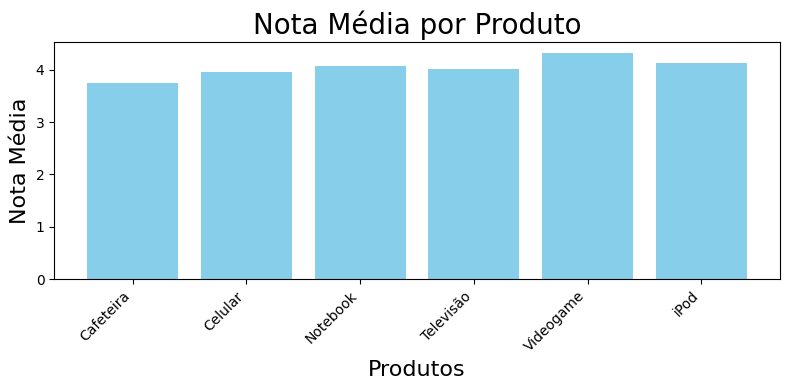

In [64]:
notasprodutos.columns = ['Produto', 'Nota Média']
# Criar gráfico
plt.figure(figsize=(8, 4))
plt.bar(notasprodutos['Produto'], notasprodutos['Nota Média'], color='skyblue')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Nota Média', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Nota Média por Produto", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

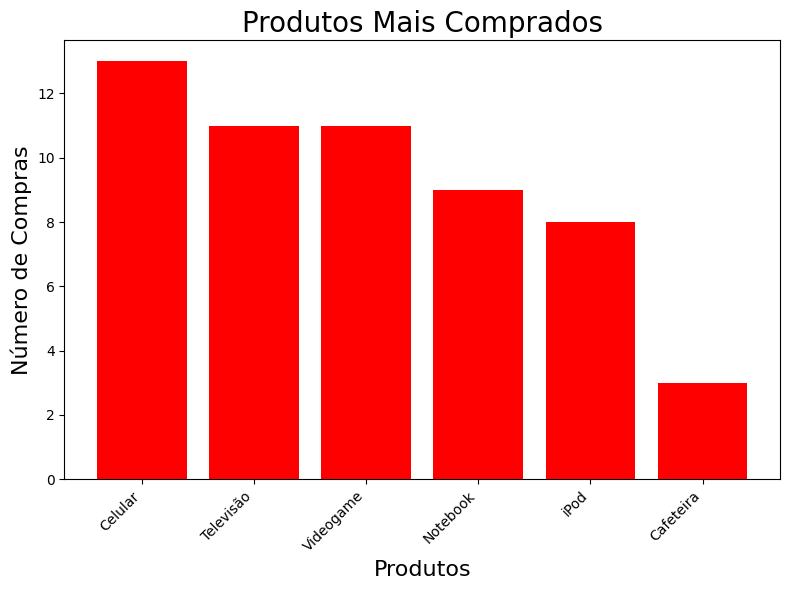

In [66]:
# Calcular a contagem de produtos comprados
produtos_comprados = df[df['purchased'] == 1]
contagem_produtos = produtos_comprados['product_name'].value_counts().reset_index()

# Renomear colunas
contagem_produtos.columns = ['Produto', 'Contagem']

# Criar gráfico
plt.figure(figsize=(8, 6))
plt.bar(contagem_produtos['Produto'], contagem_produtos['Contagem'], color='red')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Número de Compras', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotaciona as labels para melhor visualização
plt.title("Produtos Mais Comprados", fontsize=20)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

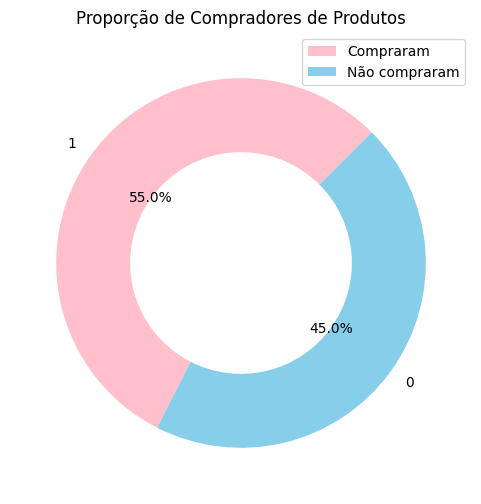

In [67]:
# Calcular a proporção de compradores
proporcao_compradores = df['purchased'].value_counts(normalize=True)

# Cores para o gráfico de pizza
cores_invertidas = ['pink', 'skyblue']

# Visualização
plt.figure(figsize=(6, 6))
plt.pie(proporcao_compradores, labels=proporcao_compradores.index, autopct='%1.1f%%',
        startangle=45, colors=cores_invertidas, wedgeprops=dict(width=0.4))
plt.title('Proporção de Compradores de Produtos')
plt.legend(['Compraram', 'Não compraram'], loc='upper right')
plt.show()